In [17]:
from PIL import Image
import sys
sys.path.append('..')
import numpy as np
from invertransforms.affine.affine import RandomAffine, Affine
import torch
import matplotlib.pyplot as plt

In [11]:
img = np.array(Image.open("t018.tif")) # from the cell tracking challenge Fluo-N2DH-GOWT1 dataset https://paperswithcode.com/dataset/fluo-n2dh-gowt1

In [19]:
ra = RandomAffine(degrees = 180, translate=[0.1,0.1], scale=[1,1], shear = [-2,2], fill = -100)

In [21]:
im_tr = ra(torch.Tensor(img[None,None,...]))

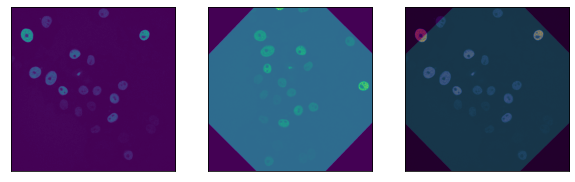

In [26]:
fig = plt.figure(figsize = (10,5))
ax = fig.subplots(1,3)

ax[0].imshow(img)
ax[0].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].imshow(im_tr.squeeze())
ax[1].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].imshow(ra.inverse_transform(im_tr).squeeze())
ax[2].imshow(img,alpha = 0.5,cmap='inferno')
ax[2].get_yaxis().set_visible(False)
ax[2].get_xaxis().set_visible(False)

